In [ ]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd


In [ ]:
sales = pd.read_csv("training.csv") #reading the csv file into a pandas dataframe

In [ ]:
print(sales.head()) #displaying the first 5 rows of the dataframe
print(sales.info()) #displaying information about the dataframe
print(sales.describe()) #displaying descriptive statistics of the dataframe

       ID  store_ID  day_of_week        date  nb_customers_on_day  open  \
0  425390       366            4  2013-04-18                  517     1   
1  291687       394            6  2015-04-11                  694     1   
2  411278       807            4  2013-08-29                  970     1   
3  664714       802            2  2013-05-28                  473     1   
4  540835       726            4  2013-10-10                 1068     1   

   promotion state_holiday  school_holiday  sales  
0          0             0               0   4422  
1          0             0               0   8297  
2          1             0               0   9729  
3          1             0               0   6513  
4          1             0               0  10882  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   

In [ ]:
print(sales.shape) #displaying the shape of the dataframe
print(sales.columns) #displaying the columns of the dataframe
display(sales.dtypes) #displaying the data types of the dataframe

(640840, 10)
Index(['ID', 'store_ID', 'day_of_week', 'date', 'nb_customers_on_day', 'open',
       'promotion', 'state_holiday', 'school_holiday', 'sales'],
      dtype='object')


ID                      int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object

In [ ]:
# show unique values in state_holiday column
sales.state_holiday.unique()

# show value counts for state_holiday column
sales['state_holiday'].value_counts()

state_holiday
0    621160
a     12842
b      4214
c      2624
Name: count, dtype: int64

In [ ]:
# Calculate missing values per column

missing_counts = sales.isna().sum() # Calculate missing values per column
print(missing_counts)


ID                     0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64


In [ ]:
# Compute correlation matrix

corr_matrix = sales.corr(numeric_only=True) # Compute correlation matrix
print(corr_matrix)

                           ID  store_ID  day_of_week  nb_customers_on_day  \
ID                   1.000000 -0.001098    -0.000831            -0.000932   
store_ID            -0.001098  1.000000     0.000329             0.023605   
day_of_week         -0.000831  0.000329     1.000000            -0.385616   
nb_customers_on_day -0.000932  0.023605    -0.385616             1.000000   
open                 0.000083 -0.001108    -0.527947             0.617264   
promotion           -0.001569 -0.000364    -0.392736             0.315858   
school_holiday      -0.000319 -0.000706    -0.206069             0.071085   
sales               -0.000880  0.004804    -0.461107             0.894872   

                         open  promotion  school_holiday     sales  
ID                   0.000083  -0.001569       -0.000319 -0.000880  
store_ID            -0.001108  -0.000364       -0.000706  0.004804  
day_of_week         -0.527947  -0.392736       -0.206069 -0.461107  
nb_customers_on_day  0.617264 

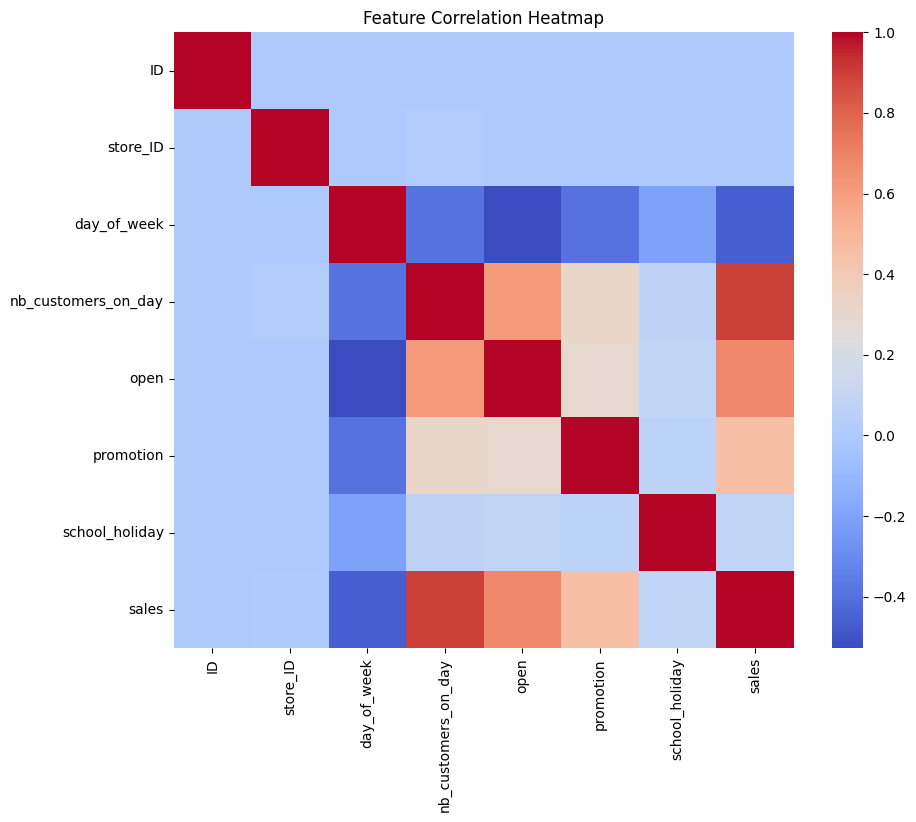

In [ ]:
#   Visualize the correlation matrix  

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))     #   Set the figure size
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False) #   Create the heatmap
plt.title("Feature Correlation Heatmap") #  Set the title
plt.show() #    Display the plot 

In [ ]:
# Identify highly correlated features

high_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr < 1]  # exclude self-correlation
high_corr[high_corr > 0.8].head(10)

sales                nb_customers_on_day    0.894872
nb_customers_on_day  sales                  0.894872
dtype: float64

In [ ]:
# Display the columns of the dataframe

sales.columns


Index(['ID', 'store_ID', 'day_of_week', 'date', 'nb_customers_on_day', 'open',
       'promotion', 'state_holiday', 'school_holiday', 'sales'],
      dtype='object')

In [ ]:
#   Create dummy variables for 'state_holiday' column

sales_dummy = pd.get_dummies(sales, columns=['state_holiday'], prefix='state_holiday')
print(sales_dummy.head())

       ID  store_ID  day_of_week        date  nb_customers_on_day  open  \
0  425390       366            4  2013-04-18                  517     1   
1  291687       394            6  2015-04-11                  694     1   
2  411278       807            4  2013-08-29                  970     1   
3  664714       802            2  2013-05-28                  473     1   
4  540835       726            4  2013-10-10                 1068     1   

   promotion  school_holiday  sales  state_holiday_0  state_holiday_a  \
0          0               0   4422             True            False   
1          0               0   8297             True            False   
2          1               0   9729             True            False   
3          1               0   6513             True            False   
4          1               0  10882             True            False   

   state_holiday_b  state_holiday_c  
0            False            False  
1            False            Fals

In [ ]:
# Display the first few rows of the new dataframe

sales_dummy.head()

sales.dtypes.value_counts()


int64     8
object    2
Name: count, dtype: int64

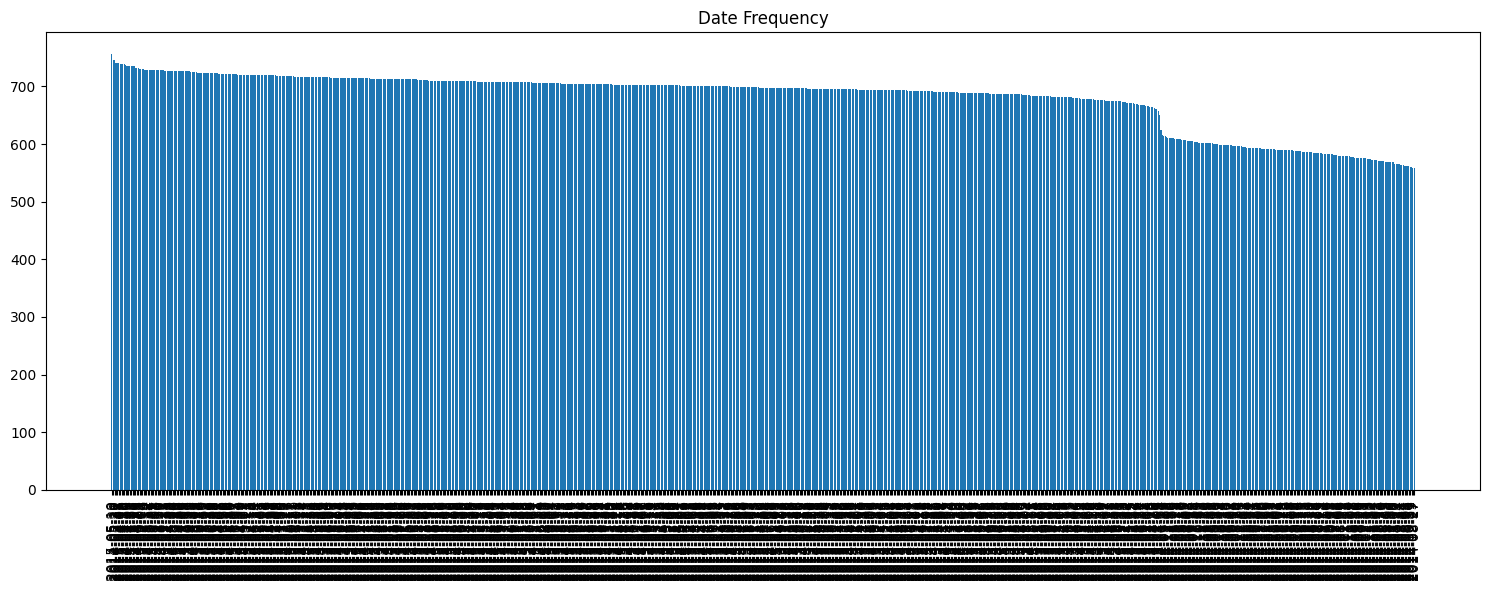

In [ ]:
# Plot date frequency

def print_bar_plot(x, y, figsize=(15, 6), title=None): #	Define a function to plot bar plots
	plt.figure(figsize=figsize) 	#	Set the figure size
	plt.bar(x, y) 					#	Plot the bar plot
	if title:						#	Set the title
		plt.title(title)
	plt.xticks(rotation=90)			#	Rotate x-axis labels for better readability
	plt.tight_layout()  			#	Adjust layout to prevent clipping
	plt.show()						#	Display the plot

# create and plot the date frequency using the correct column name 'date'
vc = sales['date'].value_counts()
print_bar_plot(vc.index, vc.values, figsize=(15, 6), title="Date Frequency")



In [ ]:
# Convert 'date' column to datetime format and extract date features

sales['date'] = pd.to_datetime(sales['date'], format='%Y-%m-%d')
sales.date

sales.select_dtypes(include=['object', 'category']).columns

sales['year'] = sales['date'].dt.year
sales['month'] = sales['date'].dt.month
sales['day'] = sales['date'].dt.day
sales['day_of_week'] = sales['date'].dt.dayofweek   # Monday=0, Sunday=6
sales['week_of_year'] = sales['date'].dt.isocalendar().week
sales['quarter'] = sales['date'].dt.quarter





In [ ]:
# Sanity Check

print(sales_dummy.head())

       ID  store_ID  day_of_week        date  nb_customers_on_day  open  \
0  425390       366            4  2013-04-18                  517     1   
1  291687       394            6  2015-04-11                  694     1   
2  411278       807            4  2013-08-29                  970     1   
3  664714       802            2  2013-05-28                  473     1   
4  540835       726            4  2013-10-10                 1068     1   

   promotion  school_holiday  sales  state_holiday_0  state_holiday_a  \
0          0               0   4422             True            False   
1          0               0   8297             True            False   
2          1               0   9729             True            False   
3          1               0   6513             True            False   
4          1               0  10882             True            False   

   state_holiday_b  state_holiday_c  
0            False            False  
1            False            Fals

In [ ]:
# Drop original 'date' and 'ID' columns if they exist

sales_dummy.drop(columns='date', inplace=True, errors='ignore')
sales_dummy.drop(columns='ID', inplace=True, errors='ignore')

print(sales_dummy.head())

   store_ID  day_of_week  nb_customers_on_day  open  promotion  \
0       366            4                  517     1          0   
1       394            6                  694     1          0   
2       807            4                  970     1          1   
3       802            2                  473     1          1   
4       726            4                 1068     1          1   

   school_holiday  sales  state_holiday_0  state_holiday_a  state_holiday_b  \
0               0   4422             True            False            False   
1               0   8297             True            False            False   
2               0   9729             True            False            False   
3               0   6513             True            False            False   
4               0  10882             True            False            False   

   state_holiday_c  
0            False  
1            False  
2            False  
3            False  
4            False  


In [ ]:
# Final Sanity Check

print(sales_dummy.head())


   store_ID  day_of_week  nb_customers_on_day  open  promotion  \
0       366            4                  517     1          0   
1       394            6                  694     1          0   
2       807            4                  970     1          1   
3       802            2                  473     1          1   
4       726            4                 1068     1          1   

   school_holiday  sales  state_holiday_0  state_holiday_a  state_holiday_b  \
0               0   4422             True            False            False   
1               0   8297             True            False            False   
2               0   9729             True            False            False   
3               0   6513             True            False            False   
4               0  10882             True            False            False   

   state_holiday_c  
0            False  
1            False  
2            False  
3            False  
4            False  


                     store_ID  day_of_week  nb_customers_on_day      open  \
store_ID             1.000000     0.000329             0.023605 -0.001108   
day_of_week          0.000329     1.000000            -0.385616 -0.527947   
nb_customers_on_day  0.023605    -0.385616             1.000000  0.617264   
open                -0.001108    -0.527947             0.617264  1.000000   
promotion           -0.000364    -0.392736             0.315858  0.294936   
school_holiday      -0.000706    -0.206069             0.071085  0.085213   
sales                0.004804    -0.461107             0.894872  0.678463   
state_holiday_0     -0.000503     0.053206             0.227339  0.379613   
state_holiday_a      0.001005    -0.041343            -0.182142 -0.303459   
state_holiday_b      0.000016    -0.040759            -0.103493 -0.174644   
state_holiday_c     -0.000866    -0.001438            -0.083525 -0.138651   

                     promotion  school_holiday     sales  state_holiday_0  

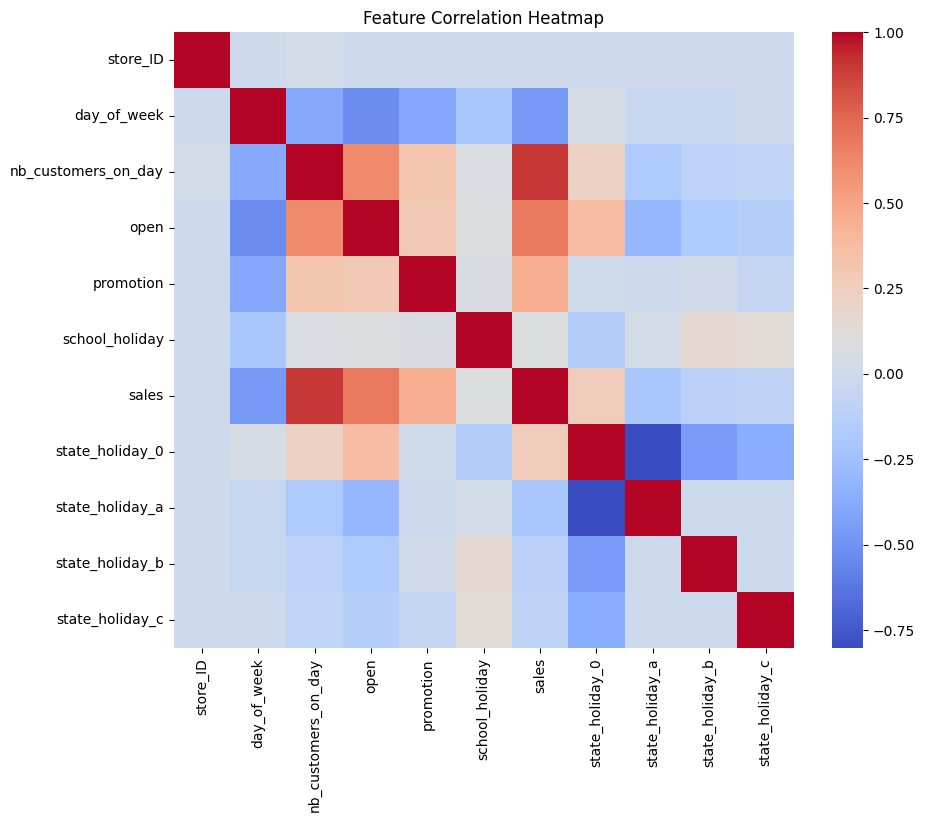

In [ ]:
# Visualize the updated correlation matrix

corr_matrix = sales_dummy.corr(numeric_only=True) # Compute correlation matrix
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()



In [ ]:
# Identify and drop highly correlated features

threshold = 0.9

#Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > threshold
to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

#show columns to drop
print("Columns to drop:", to_drop)

# Drop them
sales_dummy.drop(columns=to_drop)

Columns to drop: []


,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales,state_holiday_0,state_holiday_a,state_holiday_b,state_holiday_c
0,366,4,517,1,0,0,4422,True,False,False,False
1,394,6,694,1,0,0,8297,True,False,False,False
2,807,4,970,1,1,0,9729,True,False,False,False
3,802,2,473,1,1,0,6513,True,False,False,False
4,726,4,1068,1,1,0,10882,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
640835,409,6,483,1,0,0,4553,True,False,False,False
640836,97,1,987,1,1,0,12307,True,False,False,False
640837,987,1,925,1,0,0,6800,True,False,False,False
640838,1084,4,725,1,0,0,5344,True,False,False,False


In [299]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split


# Separate predictors (X) and target (y)
X = sales_dummy.drop(columns='sales')  # Replace 'Type' with your actual target column if different
y = sales_dummy['sales']

# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm dimensions
X_train.shape, X_test.shape




((512672, 10), (128168, 10))

In [300]:
# Preprocess the data: Scaling

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit scaler only on training set
X_train_scaled = scaler.fit_transform(X_train)

# Apply same transformation to test set
X_test_scaled = scaler.transform(X_test)

# Fit model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)




,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [301]:
# Evaluate the model

from sklearn.metrics import r2_score, mean_squared_error

y_pred = lin_reg.predict(X_test_scaled)

print("R² Score:", r2_score(y_test, y_pred))

# compute RMSE manually to avoid using the 'squared' keyword (compatibility with older sklearn)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

print("Coefficients:", lin_reg.coef_)

print("Intercept:", lin_reg.intercept_)

R² Score: 0.8511033976586159
RMSE: 1483.5562504787233
Coefficients: [ -46.48437607 -155.07885685 2819.11155419  553.61391729  625.98343846
   23.60552116   67.29796587  -54.47165757  -53.06239903    4.57354893]
Intercept: 5779.022991308283


In [302]:
# This is a regression problem (sales are continuous).
# Use regression metrics instead of classification metrics like fbeta_score.

# compute regression metrics (r2_score and mean_squared_error were already imported earlier)
mse_reg = mean_squared_error(y_test, y_pred)
rmse_reg = np.sqrt(mse_reg)
mae_reg = np.mean(np.abs(y_test - y_pred))
r2_reg = r2_score(y_test, y_pred)

print("R² Score:", r2_reg)
print("MSE:", mse_reg)
print("RMSE:", rmse_reg)
print("MAE:", mae_reg)


R² Score: 0.8511033976586159
MSE: 2200939.1483344883
RMSE: 1483.5562504787233
MAE: 980.2597922179712


In [303]:
# Print predicted values

print(y_pred)


[9680.94794765  -48.24126599 5269.55580863 ... 9684.42162673 8850.67235
 7679.94853731]


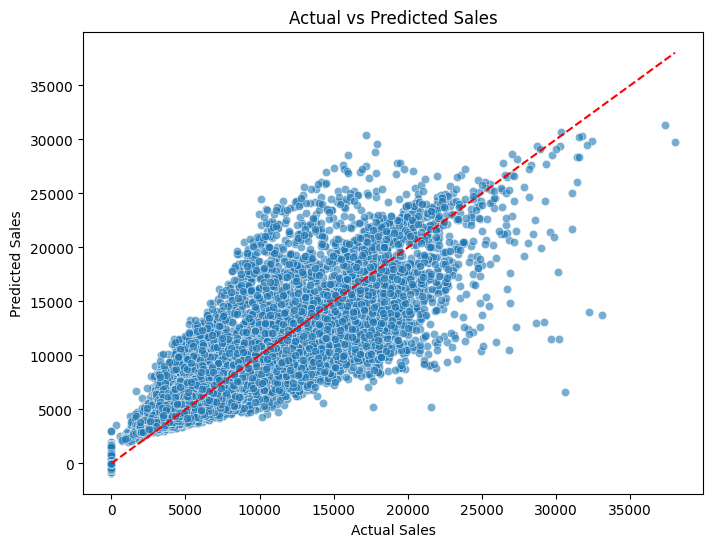

In [304]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color='red', linestyle='--')  # Perfect prediction line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

In [363]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Scalar is not needed for XGBoost, so we can skip scaling

xgb_reg = XGBRegressor(max_depth=12, learning_rate=0.1, n_estimators=100) # Initialize XGBoost Regressor
xgb_reg.fit(X_train, y_train)

y_pred2 = xgb_reg.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred2))

R² Score: 0.9376277923583984


In [364]:
# Split: 80% training, 20% testing
X_train_large, X_test_small, y_train_large, y_test_small = train_test_split(X, y, test_size=0.1, random_state=42)

xgb_reg2 = XGBRegressor(max_depth=12, learning_rate=0.1, n_estimators=100) # Initialize XGBoost Regressor
xgb_reg2.fit(X_train_large, y_train_large)

y_pred3 = xgb_reg2.predict(X_test_small)
print("R² Score:", r2_score(y_test_small, y_pred3))


R² Score: 0.939638078212738


In [365]:
realdata = pd.read_csv("REAL_DATA.csv")  # reading the csv file into a pandas dataframe

# Parse dates — REAL_DATA.csv uses day/month/year like "01/03/2015"
# try explicit format first, fall back to dayfirst inference if needed
realdata['date'] = pd.to_datetime(realdata['date'], format='%d/%m/%Y', dayfirst=True, errors='coerce')
if realdata['date'].isna().any():
	# fallback: infer remaining values with dayfirst
	realdata['date'] = pd.to_datetime(realdata['date'], dayfirst=True, errors='coerce')

# Ensure datetime and extract date features
realdata['date'] = pd.to_datetime(realdata['date'], errors='coerce')
realdata['year'] = realdata['date'].dt.year
realdata['month'] = realdata['date'].dt.month
realdata['day'] = realdata['date'].dt.day
realdata['day_of_week'] = realdata['date'].dt.dayofweek   # Monday=0, Sunday=6
realdata['week_of_year'] = realdata['date'].dt.isocalendar().week
realdata['quarter'] = realdata['date'].dt.quarter

# Prepare real data features to match training set X
# Create dummies for state_holiday as was done for training data
realdata = pd.get_dummies(realdata, columns=['state_holiday'], prefix='state_holiday')

# Drop columns that the model doesn't expect (like date, index, etc.)
realdata.drop(columns=['date', 'index', 'week_of_year', 'quarter'], inplace=True, errors='ignore')

# IMPORTANT: ensure the feature columns and order match the training data (X)
# reindex will add any missing columns with 0 and ignore extras
X_real = realdata.reindex(columns=X.columns, fill_value=0)

# Scale using the previously fitted scaler (for the linear model)
X_real_scaled = scaler.transform(X_real)

# Predict with linear regression (expects scaled features)
y_pred_real = lin_reg.predict(X_real_scaled)

# Predict with XGBoost (was trained on unscaled DataFrame), so pass X_real (unscaled)
y_pred_real2 = xgb_reg.predict(X_real)

# Show a small sample of predictions
print("Linear model predictions for REAL_DATA (first 10):", y_pred_real[:10])
print("XGBoost predictions for REAL_DATA (first 10):", y_pred_real2[:10])
print("Total predictions:", y_pred_real2.shape[0])

# show head for inspection
realdata.head()

realdata['predict_value'] = y_pred_real2

realdata.to_csv('G2.csv', index=False)




Linear model predictions for REAL_DATA (first 10): [  93.09905434  149.12898072 7158.98837208 7153.01516249 6683.5934569
 5207.2028017  5250.49313379 9874.06553978  784.79249167 6613.70091961]
XGBoost predictions for REAL_DATA (first 10): [  36.57708   -10.310828 6753.336    7126.2373   6431.912    4215.2314
 3462.0442   7419.767      41.453564 8301.078   ]
Total predictions: 71205
